# `Практикум по программированию на языке Python`

## `Задание 01. Полносвязная нейронная сеть на numpy`.

#### Фамилия, имя: Гущин Станислав

Дата выдачи: <span style="color:red">__13 февраля__</span>.

Мягкий дедлайн: <span style="color:red">__28 февраля 05:00__</span>.

Стоимость: __10 баллов__ (основная часть заданий) + __3 балла__ (дополнительные задания).

<span style="color:red">__В ноутбуке все клетки должны выполняться без ошибок при последовательном их выполнении.__</span>

#### `Москва, 2025`

In [59]:
import numpy as np

## `Теоретическая часть (3 балла)`

В этом блоке вам нужно решить 3 задания.

### `Задание 1. Градиенты для слоя Batch normalization (1.5 балла)`

Рассмотрим слой Batch normalization. Пусть на вход этого слоя был подан батч из $n$ объектов, при этом у всех объектов по 1 признаку. Представим вход BN слоя в виде $X \in \mathbb{R}^{n \times 1}$.

Тогда в этом слое производятся следующие вычисления:

$$ \mu = \frac1n \sum_{i=1}^{n} X_i $$

$$ \sigma^2 = \frac1n \sum_{i=1}^{n} \left( X_i - \mu \right) ^2 $$

$$ \tilde{y_i} = \frac{X_i - \mu}{\sqrt{\sigma^2 + \varepsilon}} $$

$$ y_i = \gamma \tilde{y_i} + \delta $$

Выходом BN слоя является $y_i$, а $\gamma,\delta\in\mathbb{R}$ — параметры, которые подбираются во время обучения вместе с другими параметрами нейронной сети (наряду, например, с весами линейного слоя).

Рассмотрим нейронную сеть, в которой есть BN слой. Предположим, что вычисления в нейронной сети завершаются подсчетом функции потерь $\mathcal{L}$. Пусть мы выполнили прямой проход по нейронной сети и сейчас делаем обратный проход с помощью метода обратного распространения ошибки. Пусть BN слою пришел градиент функции потерь по выходу BN слоя ($\nabla_{y} \mathcal{L}$).

В этом задании вам нужно записать вычисление градиента функции потерь по параметрам слоя BN $\gamma$ и $\delta$ ($\nabla_{\gamma} \mathcal{L}$, $\nabla_{\delta} \mathcal{L}$) через $\nabla_{y} \mathcal{L}$, а также вам нужно записать вычисление градиента функции потерь по входу слоя BN $X$ ($\nabla_{X} \mathcal{L}$) через $\nabla_{y} \mathcal{L}$.

Хочу заметить, в данном задании мы рассматриваем объекты всего с 1 признаком, чтобы упростить выкладки.

__Ваше решение:__

$\nabla_δL=\sum_{i=1}^{n} \frac{\partial L}{\partial y_i} \frac{\partial y_i}{\partial δ}=\{ \frac{\partial y_i}{\partial δ} = 1 \}=\sum_{i=1}^{n} (\nabla_y L)_i = \nabla_y L^T
\mathbf{1}_n,$

$\mathbf{1}_n = \begin{bmatrix} 1  \\ \vdots \\
1 \end{bmatrix} \in \mathbb{R}^{n}
$

$\nabla_\gamma L = \{ z_i = \gamma\tilde{y_i} \}= \sum_{i=1}^{n} \frac{\partial L}{\partial y_i} \frac{\partial y_i}{\partial z_i} \frac{\partial z_i}{\partial \gamma}=\{ \frac{\partial y_i}{\partial z_i} = 1, \frac{\partial z_i}{\partial \gamma} = \tilde{y_i}\}=\sum_{i=1}^{n} \frac{\partial L}{\partial y_i}\tilde{y_i} = \nabla_yL^T\tilde{y}$


$\frac{\partial L}{\partial X_1} = \sum_{i=1}^{n} \frac{\partial L}{\partial y_i} \frac{\partial y_i}{\partial (\gamma\tilde{y_i}) } \frac{\partial (\gamma\tilde{y_i})}{\partial \tilde{y_i}} \frac{\partial \tilde{y_i}}{\partial X_1}=
 \{\frac{\partial (\gamma\tilde{y_i})}{\partial \tilde{y_i}}=\gamma, \frac{\partial y_i}{\partial (\gamma\tilde{y_i})} = 1 \} +$
$
\{\frac{\partial \tilde{y_i}}{\partial X_1} = \frac{1}{\sqrt{\sigma^2+\varepsilon}} - \frac{X_1-\mu}{(\sigma^2+\varepsilon)^{\frac{3}{2}}}*\frac{1}{n}\} =
\\
=\sum_{i=1}^{n} \frac{\partial L}{\partial y_i} * 1 *\gamma * (\frac{1}{\sqrt{\sigma^2+\varepsilon}} - \frac{X_i-\mu}{(\sigma^2+\varepsilon)^{\frac{3}{2}}}*\frac{1}{n})
\Rightarrow \\
\nabla_X L = \gamma * \frac{1}{\sqrt{(\sigma^2 + \varepsilon)}} * \left( \nabla_y L^T * \mathbf{1}_n - \frac{1}{n} * \frac{1}{(\sigma^2 + \varepsilon)} \cdot (\mathbf{X} - \mu) \right)
$







### `Задание 2. Вывод инициализации весов линейного слоя при использовании ReLU в качестве функции активации (1 балл)`

Рассмотрим полносвязную нейронную сеть с функцией активации $g(y)$. Пусть сеть состоит из $L$ слоев и размер входа слоя $l$ равен $n_l\ \ (l = \overline{1, L})$.

Обозначим за $x^l \in \mathbb{R}^{n_{l}}$ вход слоя $l$, за $y^l \in \mathbb{R}^{n_{l+1}}$ — выход слоя $l$, за $W^l \in \mathbb{R}^{n_{l+1} \times n_{l}}$ — веса слоя $l$, за $b^l \in \mathbb{R}^{n_{l+1}}$ — вектор сдвига слоя $l$.

Тогда
$$y^l = W^l x^l + b^l,$$
$$x^{l+1} = g(y^l).$$

На паре вы выводили хорошую инициализацию для линейного слоя в случае, когда в качестве функции активации $g(y)$ в нейронной сети используется гиперболический тангенс $g(y) = \tanh(y)$. Сейчас вам нужно сделать подобный вывод для случая, когда в сети в качестве функций активации используется $g(y) = ReLU(y) = \max(0, y)$.

Сделаем следующие предположения насчет того, как распределены веса $W^l$, вектор сдвига $b^l$, входной вектор $x^l$, выходной вектор $y^l$ линейного слоя и градиенты функции потерь $\frac{\partial L}{\partial y^{l}}$ $(l = \overline{1, L}$):

1. Все компоненты в $W^l$ распределены одинаково и независимо друг от друга;
2. Все компоненты в $y^l$ распределены одинаково и независимо друг от друга;
3. Все компоненты в $x^l$ распределены одинаково и независимо друг от друга;
4. Все компоненты в $\frac{\partial L}{\partial y^{l}}$ распределены одинаково и независимо друг от друга;
5. Все компоненты в $W^l$ и все компоненты в $x^l$ независимы друг от друга;
6. Все компоненты в $W^l$ имеют четную плотность распределения (то есть симметричную относительно нуля: $p_{W^l}(-x) = p_{W^l}(x)$);
7. Все компоненты в $W^l$ имеют конечное матожидание;
8. Вектор $b^l$ инициализирован нулями.


Подсказки:
1. Из пунктов 6 и 7 следует, что все компоненты в $W^l$ имеют нулевое среднее ($\mathbb{E} W^l_{ij} = 0\ \ \forall i = \overline{1, n_{l+1}}, j = \overline{1, n_{l}}$) (докажите);
2. Из пунктов 6 и 7 следует, что все компоненты в $y^l$ имеют нулевое среднее и четную плотность распределения (докажите).

__Ваше решение:__

...

### `Задание 3. Почему функция активации` $ReLU(y) = \max(0, y)$ `предпочтительней сигмоиды` $\sigma(y) = \frac{1}{1 + \exp(-y)}$ `в нейронных сетях? (0.5 балла)`

Дайте развернутый ответ на вопрос "Почему функция активации $ReLU(y) = \max(0, y)$ предпочтительней сигмоиды $\sigma(y) = \frac{1}{1 + \exp(-y)}$ в нейронных сетях?"

__Ваш ответ:__

Сигмоиду сложнее вычислять из-за экспонент. Также из-за того, что производная сигмиоды $\le 1$ может происходит затухание градиента, то есть производные начальных слоёв будут сильно маленькими. Диапазон значений сигмиоды от 0 до 1, когда у ReLU от 0 до бесконечности, что что также хуже влияет на градиенты, т.к при больших значениях y сигмиода будет стремиться к нулю, у ReLU этой проблемы нет.

---

## `Практическая часть (7 баллов)`

### `Реализация нейронной сети (3 балла)`

В этом задании вы обучите полносвязную нейронную сеть распознавать рукописные цифры (а что же еще, если не их :), [почти] самостоятельно реализовав все составляющие алгоритма обучения и предсказания.

Для начала нам понадобится реализовать прямой и обратный проход через слои. Наши слои будут соответствовать следующему интерфейсу (на примере "тождественного" слоя):

In [60]:
class IdentityLayer:
    """
    A building block. Each layer is capable of performing two things:

    - Process input to get output:
    output = layer.forward(input)

    - Propagate gradients through itself:
    grad_input = layer.backward(input, grad_output)

    Some layers also have learnable parameters.

    Modified code from cs.hse DL course *
    """
    def __init__(self):
        """
        Here you can initialize layer parameters (if any)
        and auxiliary stuff. You should enumerate all parameters
        in self.params
        """
        # An identity layer does nothing
        self.params = []
        pass

    def forward(self, input):
        """
        Takes input data of shape [batch, input_units],
        returns output data [batch, output_units]
        """
        # An identity layer just returns whatever it gets as input.
        self.input = input
        return input

    def backward(self, grad_output):
        """
        Performs a backpropagation step through the layer,
        with respect to the given input.

        To compute loss gradients w.r.t input,
        you need to apply chain rule (backprop):

        d `loss` / d `input` = (d `loss` / d `layer`) * (d `layer` / d `input`)

        Luckily, you already receive d `loss` / d `layer` in argument,
        so you only need to multiply it by d `layer` / d `input`.

        NB: Sometimes d `layer` / d `input` can be a 3D or even 4D tensor.
        So it's better to write down the `loss` differential and extract
        d `layer` / d `input` from it so that only 2D tensors were present.

        The method returns:
        * gradient w.r.t input (will be passed to
          previous layer's backward method)
        * flattened gradient w.r.t. parameters (with .ravel()
          applied to each gradient).
          If there are no params, return []
        """
        # The gradient of an identity layer is precisely grad_output
        input_dim = self.input.shape[1]

        d_layer_d_input = np.eye(input_dim)

        return np.dot(grad_output, d_layer_d_input), []

#### `Слой нелинейности ReLU`

Для начала реализуем слой нелинейности $ReLU(y) = \max(0, y)$. Параметров у слоя нет. Метод `forward` должен вернуть результат поэлементного применения $ReLU$ к входному массиву, метод `backward` — градиент функции потерь по входу слоя. В нуле будем считать производную равной 0. Обратите внимание, что при обратном проходе могут понадобиться величины, посчитанные во время прямого прохода, поэтому их стоит сохранить как атрибут класса.

In [61]:
class ReLU:
    """
    Modified code from cs.hse DL course *
    """
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        self.params = [] # ReLU has no parameters

    def forward(self, input):
        """Apply elementwise ReLU to [batch, num_units] matrix"""
        ### your code here
        self.input = input
        return np.maximum(input, 0)
    def backward(self, grad_output):
        """Compute gradient of loss w.r.t. ReLU input
        grad_output shape: [batch, num_units]
        output 1 shape: [batch, num_units]
        output 2: []
        """
        ### your code here
        return grad_output * (self.input > 0), []
    def __repr__(self):
        return 'Relu()'

# relu = ReLU()
# m = np.array([[1,-2,3],
#               [4,-5,6]])
# relu.forward(m)
# relu.backward(m)

#### `Полносвязный слой`

Далее реализуем полносвязный слой без нелинейности. У слоя два параметра: матрица весов и вектор сдвига.

Обратите внимание на второй аргумент: в нем надо возвращать градиент по всем параметрам в одномерном виде. Для этого надо сначала применить `.ravel()` ко всем градиентам, а затем воспользоваться `np.r_`:

In [62]:
# example
print(np.eye(3).ravel())
np.r_[np.eye(3).ravel(), np.arange(4)]

[1. 0. 0. 0. 1. 0. 0. 0. 1.]


array([1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 2., 3.])

In [63]:
class Dense:
    """
    Modified code from cs.hse DL course *
    """
    def __init__(self, input_units, output_units):
        """
        A dense layer is a layer which performs a learned affine transformation:
        f(x) = x W + b
        """
        # initialize weights with small random numbers from normal distribution
        self.weights = np.random.randn(input_units, output_units) * 0.01
        self.biases = np.zeros(output_units)
        self.params = [self.weights, self.biases]

    def forward(self,input):
        """
        Perform an affine transformation:
        f(x) = x W + b

        input shape: [batch, input_units]
        output shape: [batch, output units]
        """
        ### your code here
        self.input = np.asarray(input)
        return np.dot(input, self.weights) + self.biases
    def backward(self, grad_output):
        """
        compute gradients
        grad_output shape: [batch, output_units]
        output shapes: [batch, input_units], [num_params]

        hint: use function np.r_
        np.r_[np.arange(3), np.arange(3)] = [0, 1, 2, 0, 1, 2]
        """
        ### your code here
        grad_x = np.dot(grad_output, self.weights.T)
        grad_w = np.dot(self.input.T, grad_output)
        grad_b = np.sum(grad_output, axis = 0)

        return grad_x, np.r_[grad_w.ravel(), grad_b.ravel()]
    def __repr__(self):
        return f'Dense({self.weights.shape[0]}, {self.weights.shape[1]})'

#### `Проверка градиента`

Проверим правильность реализации с помощью функции численной проверки градиента. Функция `eval_numerical_gradient` принимает на вход callable объект `f` (функцию от одного аргумента-матрицы) и аргумент `x` и вычисляет приближенный градиент функции `f` в точке `x`.

In [64]:
def eval_numerical_gradient(f, x, verbose=False, h=0.00001):
    """
    Evaluates gradient df/dx via finite differences:
    df/dx ~ (f(x+h) - f(x-h)) / 2h
    Adopted from https://github.com/ddtm/dl-course/
    """
    fx = f(x) # evaluate function value at original point
    grad = np.zeros_like(x)
    # iterate over all indexes in x
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:

        # evaluate function at x+h
        ix = it.multi_index
        oldval = x[ix]
        x[ix] = oldval + h # increment by h
        fxph = f(x) # evalute f(x + h)
        x[ix] = oldval - h
        fxmh = f(x) # evaluate f(x - h)
        x[ix] = oldval # restore
        # compute the partial derivative with centered formula
        grad[ix] = (fxph - fxmh) / (2 * h) # the slope    <---------------- grad[ix] было
        if verbose:
            print (ix, grad[ix])
        it.iternext() # step to next dimension
    return grad

Вычислите аналитический и численный градиенты по входу слоя ReLU от функции
$$ f(y) = \sum_i y_i, \quad y = ReLU(x) $$

Выпишите аналитический градиент в этой ячейке: \\
 $\nabla_xf = \sum_{i=1}^{n}\frac{\partial f}{\partial y_i} \frac{\partial y_i}{\partial x_i} = \{ \frac{\partial y_i}{\partial x_i} = [x_i>0], \frac{\partial f}{\partial y_i} = 1\} = $
$\begin{bmatrix} [x_1>0]  \\ \vdots \\
[x_n>0] \end{bmatrix}
$


Следующая ячейка после заполнения должна не выдавать ошибку :)

In [65]:
relu = ReLU()
points = np.linspace(-1, 1, 10*12).reshape([10, 12])

### your code here

relu_output = relu.forward(points)
grad_output = np.ones_like(relu_output)
grads = relu.backward(grad_output)

numeric_grads = eval_numerical_gradient(lambda x: np.sum(relu.forward(x)), points)
assert np.allclose(grads[0], numeric_grads, rtol=1e-3, atol=0)

Вычислите аналитический и численный градиенты по входу полносвязного слоя от функции
$$ f(y) = \sum_i y_i, \quad y = W x + b $$

Выпишите аналитический градиент в этой ячейке (советуем выписать градиент через дифференциал функции $f$):

$\frac {\partial f}{\partial x_i} = \frac {\partial f}{\partial y_i} \frac {\partial y_i}{\partial x_i} ⇒ \nabla_xf = W^T1,$
$\{ y^{output \times 1} = W^{output \times input}x^{input \times 1}+b^{output \times 1}, \nabla_xf^{input \times 1}\}$

Следующая ячейка после заполнения должна не выдавать ошибку :)

In [66]:
linear = Dense(12, 32) #input output
points = np.linspace(-1, 1, 10*12).reshape([10, 12])

### your code here
linear_output = linear.forward(points)
grad_output = np.ones_like(linear_output)
grads = linear.backward(grad_output)

numeric_grads = eval_numerical_gradient(lambda x: np.sum(linear.forward(x)), points)
assert np.allclose(grads[0], numeric_grads, rtol=1e-3, atol=0)

#### `Реализация softmax-слоя и функции потерь`

Для решения задачи многоклассовой классификации обычно используют $softmax$ в качестве нелинейности на последнем слое, чтобы получить вероятности классов для каждого объекта:
$$\hat y = softmax(x)  = \left \{\frac {\exp(x^i)}{\sum_{j=1}^K \exp(x^j)} \right \}_{i=1}^K, \quad K - \text{число классов.}$$

Здесь за $x^i$ мы обозначаем $i$-ый признак объекта $x$.

В качестве функции потерь выберем отрицательный логарифм правдоподобия (по английски: negative log likelihood или NLL)
$$L(y, \hat y) = -\sum_{i=1}^K y^i \log \hat y^i,$$
где $y^i = 1$, если объект принадлежит $i$-му классу, и $y^i = 0$ иначе.

NLL совпадает с выражением для [кросс-энтропии](https://ru.wikipedia.org/wiki/Перекрёстная_энтропия) (в качестве первого распределения берем вырожденное распределение $y$, в качестве второго — предсказанное распределение $\hat y$). Очевидно, что эту функцию потерь также можно переписать через индексацию, если через $y$ обозначить класс данного объекта:
$$L(y, \hat y) = - \log \hat y_{y}$$

В таком виде ее удобно реализовывать.

Для обучения нейронной сети будем оптимизировать эту функцию потерь по параметрам нейронной сети:

$$ \frac1N \sum_{i=1}^N L(y_i, \hat y_i) = \frac1N \sum_{i=1}^N L(y_i, \text{NN}(x_i)) \rightarrow \min_{w}\,,$$
где за $x_i$ и $y_i$ мы обозначили признаки и таргет $i$-ого объекта обучающей выборки, за $\text{NN}$ мы обозначили нейронную сеть, которая по признакам объекта $x_i$ выдает распределение вероятностей $\hat y_i$, за $w$ мы обозначили все веса нейронной сети, а $N$ — это число объектов в обучающей выборке.

Реализуйте слой `LogSoftmax` (у этого слоя нет параметров). Метод `forward` должен вычислять логарифм от $softmax$, а метод `backward` — пропускать градиенты. В общем случае в промежуточных вычислениях `backward` получится трехмерный тензор, однако для нашей конкретной функции потерь все вычисления можно реализовать в матричном виде.  Поэтому мы будем предполагать, что аргумент `grad_output` — это матрица, у которой в каждой строке только одно ненулевое значение (не обязательно единица).

**Пожелание.** Постарайтесь максимально упростить формулу градиентов, чтобы получился лаконичный и стабильный код. Большие и страшные реализации часто оказываются нестабильными.

In [67]:
from scipy.special import logsumexp
# use this function instead of np.log(np.sum(np.exp(...))) because it is more stable

In [68]:
class LogSoftmax:
    def __init__(self):
        self.params = []

    def forward(self, input):
        """
        Applies softmax to each row and then applies component-wise log
        Input shape: [batch, num_units]
        Output shape: [batch, num_units]
        """
        ### your code here
        self.input = input
        return input - logsumexp(input, axis=1, keepdims=True)
    def backward(self, grad_output):
        """
        Propagartes gradients.
        Assumes that each row of grad_output contains only 1
        non-zero element
        Input shape: [batch, num_units]
        Output shape: [batch, num_units]
        Do not forget to return [] as second value (grad w.r.t. params)
        """
        ### your code here
        exp = np.exp(self.input)
        sum_exp = np.sum(exp, axis=1, keepdims=True)
        softmax = exp / sum_exp
        return grad_output - softmax * np.sum(grad_output, axis=1, keepdims=True), []
    def __repr__(self):
        return 'LogSoftmax()'

In [69]:
log = LogSoftmax()
input = np.array([[3,3,3],
                 [2,2,2],
                 [1,1,1]])
log.forward(input)
log.backward(input)

(array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 [])

Реализуйте функцию потерь и градиенты функции потерь. Во время вычисления NLL усредняйте (а не суммируйте) значения функции потерь по батчу. Обычно так делают для того, чтобы при двух запусках обучения нейронной сети с разными размерами батча получаемые значения функции потерь у этих сетей были сравнимы.

In [70]:
def NLL(activations, target):
    """
    Returns negative log-likelihood of target under model represented by
    activations (log probabilities of classes, it's just output of LogSoftmax layer).
    `activations` has shape [batch, num_classes], `target` has shape [batch]
    Output shape: 1 (scalar).
    """
    ### your code here
    return -np.mean(activations[np.arange(activations.shape[0]), target])

def grad_NLL(activations, target):
    """
    Returns gradient of negative log-likelihood w.r.t. activations.
    each arg has shape [batch, num_classes]
    output shape: [batch, num-classes]
    """
    ### your code here
    softmax = np.exp(activations)
    dL_dact = softmax.copy()
    dL_dact[np.arange(dL_dact.shape[0]), target] -= 1
    dL_dact /= activations.shape[0]
    return dL_dact

In [71]:
activations = np.array([[1,2,3],
                        [4,5,6],
                        [7,8,9]], dtype=np.float64)
target = np.array([1,1,2])
NLL(activations, target)
grad_NLL(activations, target)

array([[9.06093943e-01, 2.12968537e+00, 6.69517897e+00],
       [1.81993833e+01, 4.91377197e+01, 1.34476264e+02],
       [3.65544386e+02, 9.93652662e+02, 2.70069464e+03]])

Наконец, выполните проверку `LogSoftmax`-слоя, используя функцию потерь и ее градиент:

In [72]:
n = 50
d = 10
lsm = LogSoftmax()
target = np.random.choice(d, size=n)
points = np.random.uniform(-1, 1, n*d).reshape([n, d])

### your code here
lgsm = lsm.forward(points)
grads = grad_NLL(lgsm, target)

def loss_fn(x):
    lgsm_updated = lsm.forward(x.reshape(n, d))
    return NLL(lgsm_updated, target)

numeric_grads = eval_numerical_gradient(loss_fn, points)
assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0)


### `Загрузка данных`

Мы реализаовали все архитектурные составляющие нашей нейронной сети. Осталось загрузить данные и обучить модель. Мы будем работать с датасетом `digits`, каждый объект в котором — это 8x8 изображение рукописной цифры.

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
from sklearn.datasets import load_digits

In [75]:
X, y = load_digits(return_X_y=True)

In [76]:
X.shape, y.shape

((1797, 64), (1797,))

Разделим данные на обучение и контроль:

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [79]:
X_train.shape, X_test.shape

((1347, 64), (450, 64))

### `Сборка и обучение нейронной сети (0.8 балла)`

В нашей реализации мы представляем нейронную сеть в виде списка ее слоев. Например, следующая функция конструирует нейронную сеть заданной ширины (то есть с заданным размером скрытых слоев) и глубины (то есть с заданным количеством слоев) с заданным размером входа и выхода, а также с заданной функцией активации между линейными слоями.

In [80]:
def make_network(input_size, hidden_layers_size, output_size, n_layers=3, activation_class=ReLU):
    network = []

    for layer_idx in range(n_layers):
        # Compute sizes of current linear layer
        layer_in = input_size if layer_idx == 0 else hidden_layers_size
        layer_out = output_size if layer_idx == n_layers - 1 else hidden_layers_size

        # Add linear layer to the network
        network.append(Dense(layer_in, layer_out))

        # Add activation after each layer except the last one
        if layer_idx != n_layers - 1:
            network.append(activation_class())

    # Add LogSoftmax layer to the network
    network.append(LogSoftmax())

    return network

In [81]:
input_size = X_train.shape[1]
hidden_layers_size = 32
output_size = 10

network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
network

[Dense(64, 32), Relu(), Dense(32, 32), Relu(), Dense(32, 10), LogSoftmax()]

Реализуйте функцию, которая выполнет прямой проход по нейронной сети:

In [82]:
def forward(network, X):
    """
    Perform forward pass through the network.

    network: list of layers
    X: raw data
    X shape: [batch, features_num]

    output:
    output shape: [batch, out_features_num]
    """
    ### your code here
    data = X
    for network_step in network:
        data = network_step.forward(data)
    return data

In [83]:
forward(network, X_train).shape

(1347, 10)

Для проверки, хорошо ли сеть обучилась, нам понадобится вычислять долю правильных ответов (accuracy) на данной выборке. Для этого реализуйте функцию, которая делает предсказания на каждом объекте (логично в качестве предсказания на очередном объекте выдавать тот класс, для которого предсказанный логарифм вероятности максимален):

In [84]:
def predict(network, X):
    """
    Returns predictions for each object in X.

    network: list of layers
    X: raw data
    X shape: [batch, features_num]

    output: array of classes, each from 0 to 9
    output shape: [batch]
    """
    ### your code here
    pred = forward(network, X)
    return np.argmax(pred, axis=1)

Мы будем обучать параметры нейросети с помощью готовой функции оптимизации из модуля `scipy`:

In [85]:
from scipy.optimize import minimize

In [86]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is a 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where ``n`` is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see he

Эта функция имеет стандартный интерфейс: нужно передать callable объект, который вычисляет значение и градиент целевой функции, а также точку старта оптимизации — начальное приближение (одномерный `numpy`-массив). Поэтому нам понадобятся функции для сбора и задания всех весов нашей нейросети (именно для них мы всегда записывали параметры слоя в список `layer.params`)

In [87]:
def get_weights(network):
    weights = []
    for layer in network:
        for param in layer.params:
            weights += param.ravel().tolist()
    return np.array(weights)


def set_weights(weights, network):
    i = 0
    for layer in network:
        for param in layer.params:
            l = param.size
            param[:] = weights[i:i+l].reshape(param.shape)
            i += l

Вам нужно реализовать ту самую функцию, которую мы будем передавать в `minimize`. Эта функция должна брать на вход текущую точку (вектор всех параметров), а также список дополнительных параметров (мы будем передавать через них нашу сеть и обучающие данные) и возвращать значение критерия качества (NLL) и его градиент по параметрам модели.

In [88]:
def compute_loss_grad(weights, args):
    """
    takes current weights and computes cross-entropy and gradients
    weights shape: [num_parameters]
    output 1: loss (scalar)
    output 2: gradint w.r.t. weights, shape: [num_parameters]

    hint: firstly perform forward pass through the whole network
    then compute loss and its gradients
    then perform backward pass, transmitting first baskward output
    to the previos layer and saving second baskward output in a list
    finally flatten all the gradients in this list
    (in the order from the first to the last layer)

    Do not forget to set weights of the network!
    """
    network, X, y = args
    ### your code here
    set_weights(weights, network)
    #loss
    output = forward(network, X)
    loss = -np.mean(output[np.arange(output.shape[0]), y])
    #backward
    grad_params = []
    grad_output = grad_NLL(output, y)
    for dense in reversed(network):
        grad_x, grad_wb = dense.backward(grad_output)
        grad_params.insert(0, grad_wb)
        grad_output = grad_x
    return loss, np.concatenate(grad_params)

Теперь мы готовы обучать нашу нейросеть.

In [89]:
weights = get_weights(network)

In [90]:
weights

array([0.01538864, 0.0145273 , 0.00742069, ..., 0.        , 0.        ,
       0.        ])

In [91]:
weights.shape

(3466,)

In [92]:
res = minimize(
    compute_loss_grad, weights,       # fun and start point
    args=[network, X_train, y_train], # args passed to fun
    method="L-BFGS-B",                # optimization method
    jac=True                          # says that gradient is computed in fun
)

In [93]:
res.keys()

dict_keys(['fun', 'jac', 'nfev', 'njev', 'nit', 'status', 'message', 'x', 'success', 'hess_inv'])

In [94]:
res["nit"] # number of iterations (should be >> 10)

105

In [95]:
res["success"] # should be True

True

In [96]:
res["x"] # leraned weights

array([ 0.01538864,  0.0145273 ,  0.00742069, ..., -0.48565989,
       -1.26140831, -0.34446492])

Выведите качество на обучении (`X_train`, `y_train`) и на контроле (`X_test`, `y_test`). Не забудьте установить веса!

In [97]:
### your code here
# set_weights(res["x"], network)
res_train = predict(network, X_train) == y_train
res_test = predict(network, X_test) == y_test
accuracy_train = np.sum(res_train) / res_train.shape[0]
accuracy_test = np.sum(res_test) / res_test.shape[0]
print(f"accuracy_train: {accuracy_train}, accuracy_test:{accuracy_test}")

accuracy_train: 1.0, accuracy_test:0.9488888888888889


У `minimize` есть также аргумент `callback` — в нее можно передать функцию, которая будет вызываться после каждой итерации оптимизации. Такую функцию удобно оформить в виде метода класса, который будет сохранять качество на обучении контроле после каждой итерации. Реализуйте этот метод в классе `Callback`:

In [98]:
class Callback:
    def __init__(self, network, X_train, y_train, X_test, y_test, print=False):
        self.network = network
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.print = print
        self.train_acc = []
        self.test_acc = []

    def call(self, weights):
        """
        Computes quality on train and test set with given weights
        and saves to self.train_acc and self.test_acc.
        If self.print is True, also prints these 2 values
        """
        ### your code here
        set_weights(weights, self.network)

        train_accuracy = np.sum(predict(network, X_train) == y_train) / y_train.shape[0]
        test_accuracy = np.sum(predict(network, X_test) == y_test) / y_test.shape[0]
        self.train_acc.append(train_accuracy)
        self.test_acc.append(test_accuracy)
        if self.print:
            print(f"train_accuracy: {train_accuracy}, test_accuracy: {test_accuracy}")

In [99]:
cb = Callback(network, X_train, y_train, X_test, y_test, print=True)

res = minimize(
    compute_loss_grad, weights,
    args=[network, X_train, y_train],
    method="L-BFGS-B",
    jac=True,
    callback=cb.call
)

train_accuracy: 0.10616184112843356, test_accuracy: 0.08444444444444445
train_accuracy: 0.23459539717891612, test_accuracy: 0.19777777777777777
train_accuracy: 0.23385300668151449, test_accuracy: 0.18888888888888888
train_accuracy: 0.29992576095025986, test_accuracy: 0.2644444444444444
train_accuracy: 0.4112843355605048, test_accuracy: 0.39555555555555555
train_accuracy: 0.4142538975501114, test_accuracy: 0.3688888888888889
train_accuracy: 0.3801039346696362, test_accuracy: 0.37333333333333335
train_accuracy: 0.4112843355605048, test_accuracy: 0.3888888888888889
train_accuracy: 0.4981440237564959, test_accuracy: 0.4888888888888889
train_accuracy: 0.5612472160356348, test_accuracy: 0.5133333333333333
train_accuracy: 0.532293986636971, test_accuracy: 0.4955555555555556
train_accuracy: 0.6332590942835932, test_accuracy: 0.6022222222222222
train_accuracy: 0.6310319227913883, test_accuracy: 0.6155555555555555
train_accuracy: 0.6533036377134372, test_accuracy: 0.6422222222222222
train_accura

Изобразите на графике кривую качества на обучени и контроле по итерациям:

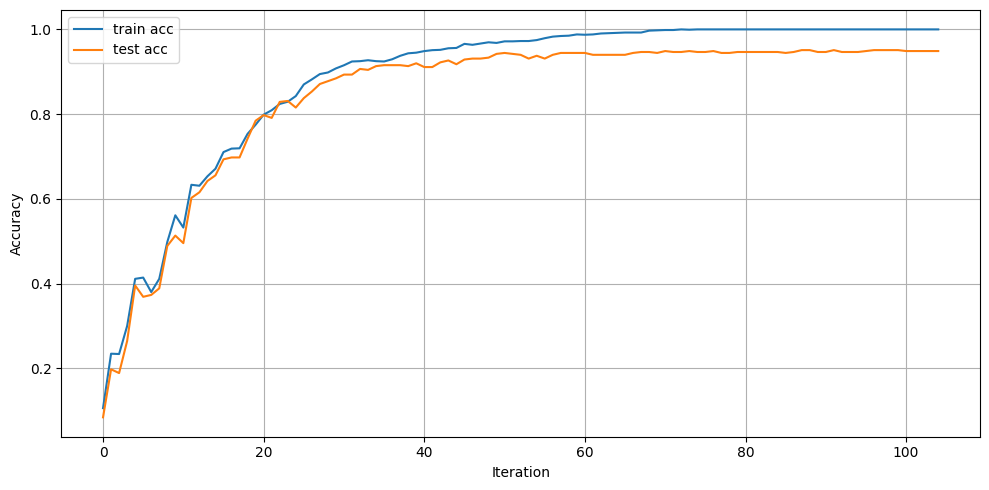

In [100]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(cb.train_acc, label="train acc")
ax.plot(cb.test_acc, label="test acc")
ax.set_xlabel("Iteration")
ax.set_ylabel("Accuracy")
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

### `Эксперименты с числом слоев (0.6 балла)`

Ясно, что из-за случайного начального приближения с каждым запуском обучения мы будем получать различное качество. Попробуем обучить нашу нейросеть с разным числом слоев несколько раз.

Заполните матрицы `accs_train` и `accs_test`. В позиции `[i, j]` должна стоять величина доли правильных ответов сети с $i+1$ полносвязными слоями при $j$-м запуске (все запуски идентичны).

In [101]:
accs_train = np.zeros((10, 10))
accs_test = np.zeros((10, 10))

In [102]:
### your code here
input_size = X_train.shape[1]
hidden_layers_size = 32
output_size = 10
for i in range(10):
    for j in range(10):
        network = make_network(input_size, hidden_layers_size, output_size, i + 1, ReLU)
        weights = get_weights(network)
        res = minimize(
            compute_loss_grad, weights,       # fun and start point
            args=[network, X_train, y_train], # args passed to fun
            method="L-BFGS-B",                # optimization method
            jac=True                          # says that gradient is computed in fun
        )
        set_weights(res["x"], network)
        train_accuracy = np.sum(predict(network, X_train) == y_train) / y_train.shape[0]
        test_accuracy = np.sum(predict(network, X_test) == y_test) / y_test.shape[0]
        accs_train[i, j] = train_accuracy
        accs_test[i, j] = test_accuracy

<ipython-input-68-41510c2c1f05>:24: RuntimeWarning: overflow encountered in exp
  exp = np.exp(self.input)
<ipython-input-68-41510c2c1f05>:26: RuntimeWarning: invalid value encountered in divide
  softmax = exp / sum_exp


In [103]:
accs_train

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 0.2501856 , 0.10319228, 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.16852264, 1.        , 0.10467706, 0.23830735, 1.        ,
        1.        , 1.        , 0.21603563, 0.19153675, 0.10764662],
       [0.11432814, 0.10616184, 0.10616184, 0.11061618, 1.        ,
        0.10838901, 1.        , 0.10616184, 1.        , 0.12769117],
       [0.10616184, 0.10616184, 0.10616184, 0.10616184, 0.10616184,
        0.10616184, 0.10616184, 0.10616184, 0.10616184, 0.10616184],
       [0.10616184, 0.10616184, 0.10616184, 0.10616184, 0.10616184,
        0.10616184, 0.10616184, 0.10616184, 0.10616184, 0.10616184],
       [0.10616184, 0.10616184, 0.1061618

In [104]:
accs_test

array([[0.94444444, 0.94444444, 0.94888889, 0.94888889, 0.94222222,
        0.94444444, 0.94666667, 0.94444444, 0.94888889, 0.94888889],
       [0.94222222, 0.96666667, 0.95111111, 0.95777778, 0.95333333,
        0.94444444, 0.94666667, 0.95777778, 0.93111111, 0.94444444],
       [0.94888889, 0.95555556, 0.20666667, 0.09555556, 0.95777778,
        0.94444444, 0.95555556, 0.94666667, 0.95111111, 0.95555556],
       [0.19555556, 0.96444444, 0.08444444, 0.22      , 0.94666667,
        0.96      , 0.93111111, 0.2       , 0.17777778, 0.11333333],
       [0.09555556, 0.08444444, 0.08444444, 0.1       , 0.92888889,
        0.1       , 0.94444444, 0.08444444, 0.94888889, 0.11111111],
       [0.08444444, 0.08444444, 0.08444444, 0.08444444, 0.08444444,
        0.08444444, 0.08444444, 0.08444444, 0.08444444, 0.08444444],
       [0.08444444, 0.08444444, 0.08444444, 0.08444444, 0.08444444,
        0.08444444, 0.08444444, 0.08444444, 0.08444444, 0.08444444],
       [0.08444444, 0.08444444, 0.0844444

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

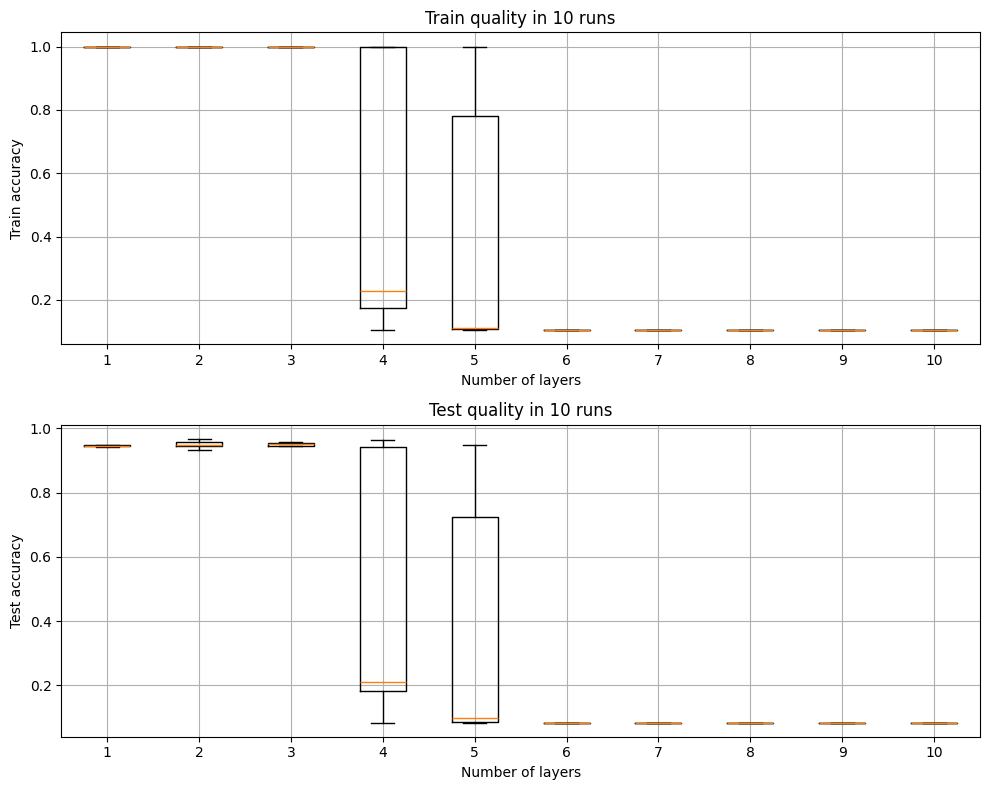

In [105]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].boxplot(accs_train.T, showfliers=False)
axes[1].boxplot(accs_test.T, showfliers=False)

axes[0].set_xlabel("Number of layers")
axes[1].set_xlabel("Number of layers")

axes[0].set_ylabel("Train accuracy")
axes[1].set_ylabel("Test accuracy")

axes[0].set_title("Train quality in 10 runs")
axes[1].set_title("Test quality in 10 runs")

axes[0].grid(True)
axes[1].grid(True)

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как изменяются качество на обучении и контроле и устойчивость процесса обучения при увеличении числа слоев?
* Можно ли сказать, что логистическая регрессия (линейная модель) дает качество хуже, чем нелинейная модель?

__Ответы:__
устойчивость модели при увеличении числа слоев, начиная с 3 слоя уменьшается. Качество, начиная с 4 слоёв уменьшается с каждым добавлением слоя.

На первых двух слоях нейросеть работает скорее всего лучше линейной, но при увеличении количества слоёв (4 и более) линейная модель будет, скорее всего, лучше глубокой нелинейной.

### `Эксперименты c различными инициализациями весов (0.6 балла)`

Как уже было сказано, начальная инициализация весов нейронной сети может сильно влиять на процесс ее обучения и, как следствие, на ее качество.

В этом пункте вам предлагается попробовать обучить несколько нейронных сетей с различными инициализациями слоев.

Для этого необходимо реализовать функцию, инициализирующую веса линейных слоёв нашей нейронной сети. Добавьте в функционал данного метода возможность инициализировать его веса с помощью инициализации Kaiming (используется, если в нейронной сети в качестве функций активации используется ReLU) и инициализации Xavier (используется, если в нейронной сети в качестве функций активации используется Tanh или Sigmoid):

In [106]:
def initialize_network(network, initialization):
    for layer in network:
        if isinstance(layer, Dense):
            input_units, output_units = layer.weights.shape
            if initialization == 'Kaiming':
                ### your code here
                layer.weights = np.random.normal(0, 2 / np.sqrt(input_units), size=(input_units, output_units))
                pass
            elif initialization == 'Xavier':
                ### your code here
                layer.weights = np.random.normal(0, 1 / (input_units + output_units), size=(input_units, output_units))
                pass
            else:
                # Initialize weights with small random numbers from normal distribution.
                # In this case `initialization` represents a standard deviation
                # for normal distribution.
                layer.weights = np.random.randn(input_units, output_units) * initialization
            layer.biases = np.zeros_like(layer.biases)

            layer.params = [layer.weights, layer.biases]

Теперь попробуйте для каждой из 3 инициализаций обучить нейронную сеть несколько раз. Попробуйте проделать данную операцию при зафиксированном числе слоев равным 3, 4 и 5.

#### `3 слоя`

Зафиксируйте в сети число слоев равное трем.

Заполните матрицы `accs_train` и `accs_test`. В позиции `[i, j]` должна стоять величина доли правильных ответов сети при $j$-м запуске (все запуски идентичны) с инициализацией Kaiming при $i = 3$, с инициализацией Xavier при $i = 4$ и с инициализацией из нормального распределения с фиксированными параметрами при $0 \leqslant i \leqslant 2$ (попробуйте здесь 3 разных параметра для стандартного отклонения для нормального распределения, например: `1e-3`, `1e-2`, `1e-1`). Заметьте, что при большом числе слоев слишком низкое стандартное отклонение может не давать нейронной сети нормально обучиться.

In [107]:
init_vars = [1e-3, 1e-2, 1e-1, 'Kaiming', 'Xavier']

In [108]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [109]:
### your code here
input_size = X_train.shape[1]
hidden_layers_size = 32
output_size = 10
for i in range(5):
    for j in range(5):
        network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
        initialize_network(network, init_vars[i])
        weights = get_weights(network)
        res = minimize(
            compute_loss_grad, weights,       # fun and start point
            args=[network, X_train, y_train], # args passed to fun
            method="L-BFGS-B",                # optimization method
            jac=True                          # says that gradient is computed in fun
        )
        set_weights(res["x"], network)
        train_accuracy = np.sum(predict(network, X_train) == y_train) / y_train.shape[0]
        test_accuracy = np.sum(predict(network, X_test) == y_test) / y_test.shape[0]
        accs_train[i, j] = train_accuracy
        accs_test[i, j] = test_accuracy

<ipython-input-68-41510c2c1f05>:24: RuntimeWarning: overflow encountered in exp
  exp = np.exp(self.input)
<ipython-input-68-41510c2c1f05>:26: RuntimeWarning: invalid value encountered in divide
  softmax = exp / sum_exp


In [110]:
accs_train

array([[0.20861173, 0.29101707, 1.        , 0.3363029 , 0.18188567],
       [0.10616184, 1.        , 0.10467706, 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ]])

In [111]:
accs_test

array([[0.23555556, 0.28222222, 0.94222222, 0.31111111, 0.19111111],
       [0.08444444, 0.95555556, 0.08222222, 0.96      , 0.95111111],
       [0.95111111, 0.95333333, 0.95333333, 0.95333333, 0.96222222],
       [0.96222222, 0.96      , 0.95555556, 0.95777778, 0.96      ],
       [0.94444444, 0.95777778, 0.95777778, 0.94666667, 0.94666667]])

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

<ipython-input-112-f24671efa300>:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(accs_test.T, labels=init_vars_for_plot, showfliers=False)


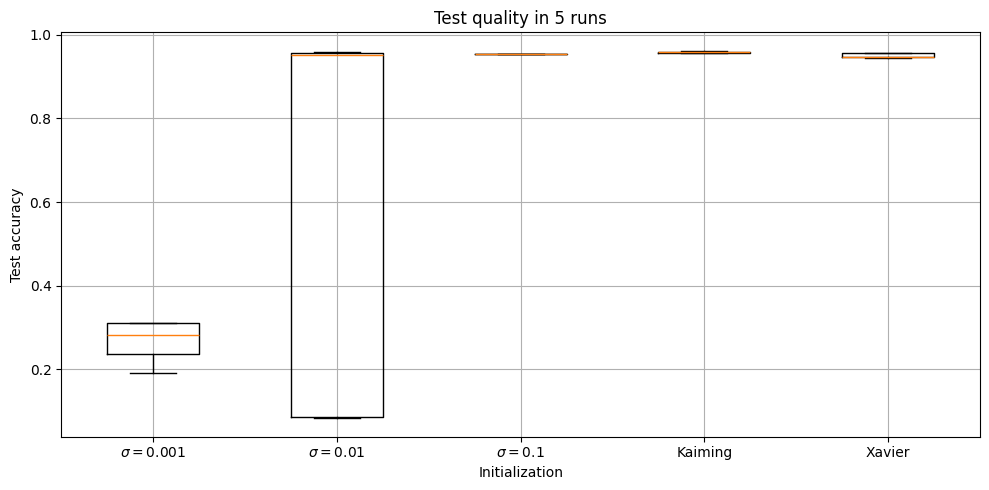

In [112]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test.T, labels=init_vars_for_plot, showfliers=False)

ax.set_title("Test quality in 5 runs")
ax.set_xlabel("Initialization")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

#### `4 слоя`

Выполните тут тот же код, что и в предыдущем пункте, но только уже с 4 слоями в сети.

In [113]:
init_vars = [5e-3, 1e-2, 1e-1, 'Kaiming', 'Xavier']

In [114]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [115]:
### your code here
input_size = X_train.shape[1]
hidden_layers_size = 32
output_size = 10
for i in range(5):
    for j in range(5):
        network = make_network(input_size, hidden_layers_size, output_size, 4, ReLU)
        initialize_network(network, init_vars[i])
        weights = get_weights(network)
        res = minimize(
            compute_loss_grad, weights,       # fun and start point
            args=[network, X_train, y_train], # args passed to fun
            method="L-BFGS-B",                # optimization method
            jac=True                          # says that gradient is computed in fun
        )
        set_weights(res["x"], network)
        train_accuracy = np.sum(predict(network, X_train) == y_train) / y_train.shape[0]
        test_accuracy = np.sum(predict(network, X_test) == y_test) / y_test.shape[0]
        accs_train[i, j] = train_accuracy
        accs_test[i, j] = test_accuracy

<ipython-input-68-41510c2c1f05>:24: RuntimeWarning: overflow encountered in exp
  exp = np.exp(self.input)
<ipython-input-68-41510c2c1f05>:26: RuntimeWarning: invalid value encountered in divide
  softmax = exp / sum_exp


Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

In [116]:
accs_train

array([[0.09873794, 0.25909428, 1.        , 1.        , 1.        ],
       [1.        , 1.        , 0.11284336, 0.09948033, 0.0935412 ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.23830735, 1.        , 1.        , 0.10319228, 0.10393467]])

In [117]:
accs_test

array([[0.09777778, 0.24444444, 0.94888889, 0.94222222, 0.96      ],
       [0.94666667, 0.96      , 0.11111111, 0.10666667, 0.10666667],
       [0.95111111, 0.95555556, 0.96      , 0.95555556, 0.96      ],
       [0.96222222, 0.94222222, 0.96444444, 0.95111111, 0.95333333],
       [0.24222222, 0.93333333, 0.94888889, 0.09555556, 0.10888889]])

<ipython-input-118-f24671efa300>:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(accs_test.T, labels=init_vars_for_plot, showfliers=False)


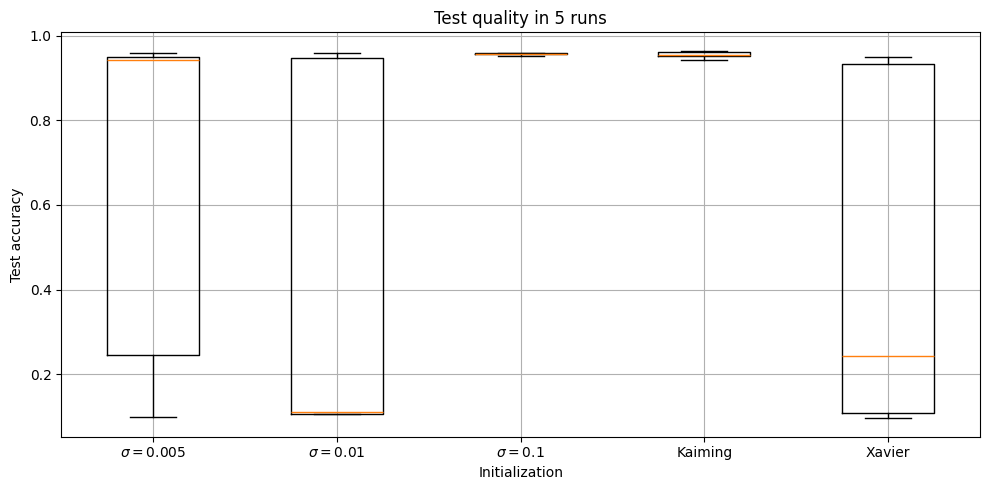

In [118]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test.T, labels=init_vars_for_plot, showfliers=False)

ax.set_title("Test quality in 5 runs")
ax.set_xlabel("Initialization")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

#### `5 слоев`

Выполните тут тот же код, что и в предыдущем пункте, но только уже с 5 слоями в сети.

In [119]:
init_vars = [1e-2, 1e-1, 1e0, 'Kaiming', 'Xavier']

In [120]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [121]:
### your code here
input_size = X_train.shape[1]
hidden_layers_size = 32
output_size = 10
for i in range(5):
    for j in range(5):
        network = make_network(input_size, hidden_layers_size, output_size, 5, ReLU)
        initialize_network(network, init_vars[i])
        weights = get_weights(network)
        res = minimize(
            compute_loss_grad, weights,       # fun and start point
            args=[network, X_train, y_train], # args passed to fun
            method="L-BFGS-B",                # optimization method
            jac=True                          # says that gradient is computed in fun
        )
        set_weights(res["x"], network)
        train_accuracy = np.sum(predict(network, X_train) == y_train) / y_train.shape[0]
        test_accuracy = np.sum(predict(network, X_test) == y_test) / y_test.shape[0]
        accs_train[i, j] = train_accuracy
        accs_test[i, j] = test_accuracy

<ipython-input-68-41510c2c1f05>:24: RuntimeWarning: overflow encountered in exp
  exp = np.exp(self.input)
<ipython-input-68-41510c2c1f05>:26: RuntimeWarning: invalid value encountered in divide
  softmax = exp / sum_exp


Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

In [122]:
accs_train

array([[1.        , 0.19821826, 0.10616184, 0.09873794, 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.09725316, 0.09279881, 0.10393467, 0.1172977 , 0.10319228],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 0.15293244, 0.18634001]])

In [123]:
accs_test

array([[0.93777778, 0.17555556, 0.08444444, 0.09777778, 0.94      ],
       [0.96      , 0.95111111, 0.94666667, 0.95111111, 0.95555556],
       [0.10666667, 0.07777778, 0.10444444, 0.12      , 0.09555556],
       [0.95111111, 0.95111111, 0.96      , 0.93333333, 0.94888889],
       [0.94      , 0.95555556, 0.93111111, 0.14      , 0.14666667]])

<ipython-input-124-f24671efa300>:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(accs_test.T, labels=init_vars_for_plot, showfliers=False)


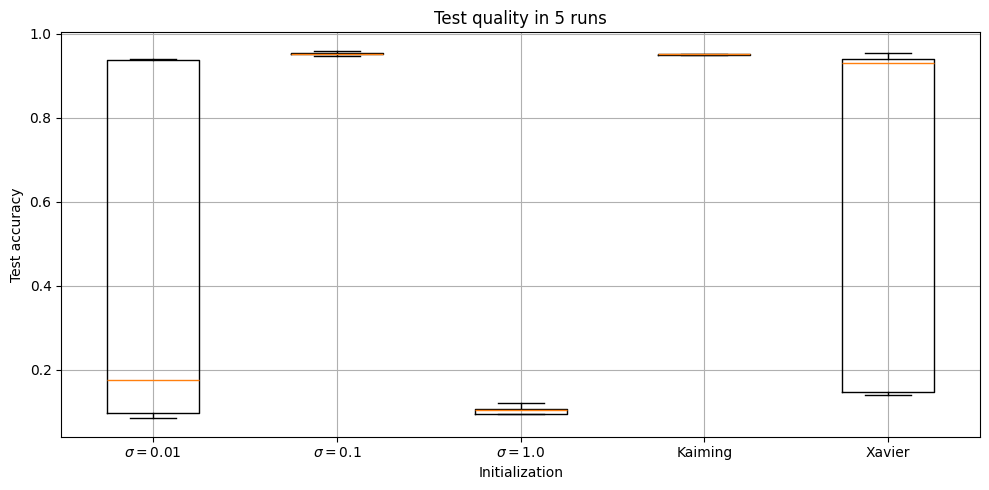

In [124]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test.T, labels=init_vars_for_plot, showfliers=False)

ax.set_title("Test quality in 5 runs")
ax.set_xlabel("Initialization")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как отличаются качество на обучении и контроле и устойчивость процесса обучения при различных инициализациях?
* Какие инициализации помогают обучать более глубокие сети?

__Ответы:__

• При Kaiming и $\sigma = 0.1$ модель имеет самую высокую устойчивость и точность. Xavier перестаёт быть устойчивым при 5 слоях, но возможно это нерепрентативно из-за того, что при 5 слоях модель в целом хуже обучается. $\sigma=0.01$ неустойчив. $\sigma$ порядка $10^{-3}$ неточен и имеет маленькую точность. $\sigma$ про устойчивость сложно сказать, но плох на 5 слоях. \\
•Разницы в качестве на обучении и контроле в целом нету, то есть модель обладает хорошей обобщающей способностью \\
•Kaiming и $\sigma=0.1$ скорее всего будут наиболее эффективны при обучении глубоких сетей  

Теперь сравним скорость обучения при различных инициализациях. Создайте два списка списков `accs_test_on_iterations`, `accs_train_on_iterations` в каждом из которых в позиции `[i]` (см. описание `i` в предыдущем пункте) будет лежать список из значений `accuracy` на тестовой и обучающей выборках соотвественно, полученных во время обучения модели. Количество слоев в сети зафиксируйте равным 4.

In [125]:
init_vars = [1e-3, 1e-2, 1e-1, 'Kaiming', 'Xavier']

In [126]:
accs_test_on_iterations = []
accs_train_on_iterations = []

In [150]:
### your code here
for i in range(5):
    network = make_network(input_size, hidden_layers_size, output_size, 4, ReLU)
    cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
    initialize_network(network, init_vars[i])
    weights = get_weights(network)
    res = minimize(
        compute_loss_grad, weights,       # fun and start point
        args=[network, X_train, y_train], # args passed to fun
        method="L-BFGS-B",                # optimization method
        jac=True,                         # says that gradient is computed in fun
        callback=cb.call
    )
    accs_test_on_iterations.append(cb.test_acc)
    accs_train_on_iterations.append(cb.train_acc)




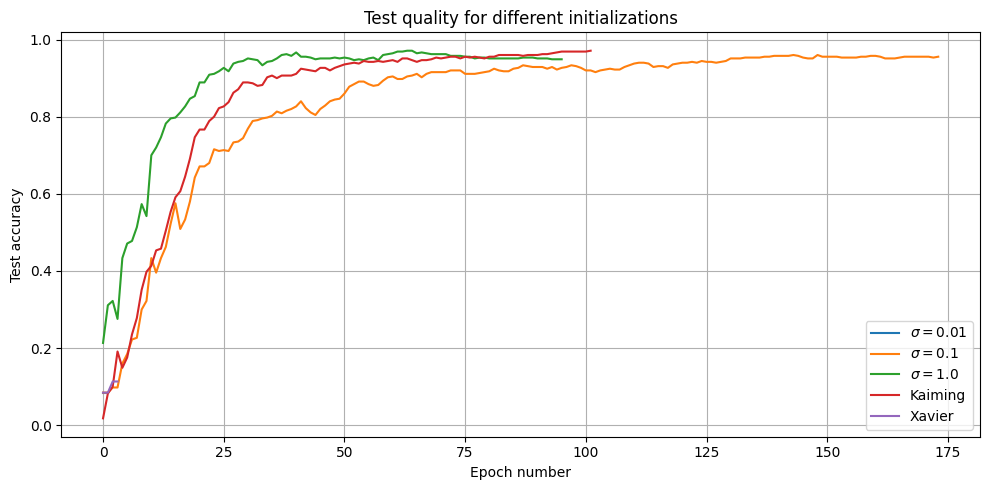

In [151]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for idx, label in enumerate(init_vars_for_plot):
    ax.plot(accs_test_on_iterations[idx], label=label)

ax.set_title("Test quality for different initializations")
ax.set_xlabel("Epoch number")
ax.set_ylabel("Test accuracy")
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как меняется скорость обучения в зависимости от выбранной инициализации?

__Ответы:__
быстрее всего на плато вышла модель
$
  W_{i,j} \sim \mathcal{N}(0,\,1)\,.
 $ У неё самая большая скорость обучения. При Kaiming чуть медленнее обучается на начальных эпохах и выходит на плато также чуть позже.
При $\sigma=0.1$ инициализации модель дольше обучается на начальных эпохах и в целом намного позже выходят на плато. Для $\sigma=0.01$, Xavier вообще не получилось обучить модель, скорее всего градиенты взорвались или затухли из-за того, что дисперсия градиентов меняется.



### `Эксперименты c различными функциями активации (0.6 балла)`

Проверим теперь, с какой функцией активации нейронная сеть будет обучаться лучше.

В этом пункте вам предлагается попробовать обучить несколько нейронных сетей с различными функциями активации.

Для этого нам нужно реализовать еще 2 слоя: для функций активации `Tanh` и `Sigmoid`.

In [129]:
class Tanh:
    """
    tanh(y) = (e^y - e^(-y)) / (e^y + e^(-y))
    Используйте функцию np.tanh для подсчета гиперболического тангенса.
    Вы можете сами реализовать подсчет tanh, но тогда вам нужно устойчиво его вычислять.
    """
    def __init__(self):
        self.params = [] # Tanh has no parameters

    def forward(self, input):
        """
        Apply elementwise Tanh to [batch, num_units] matrix
        """
        ### your code here
        self.input = input
        return np.tanh(self.input)
    def backward(self, grad_output):
        """
        Compute gradient of loss w.r.t. Tanh input
        grad_output shape: [batch, num_units]
        output 1 shape: [batch, num_units]
        output 2: []
        """
        ### your code here
        yz = -np.square(np.tanh(self.input)) + 1
        return grad_output * yz, []
    def __repr__(self):
        return 'Tanh()'

In [130]:
from scipy.special import expit

In [131]:
from scipy.special import expit

class Sigmoid:
    """
    sigmoid(y) = 1 / (1 + e^(-y))
    Используйте функцию expit для подсчета сигмоиды.
    Вы можете сами реализовать подсчет сигмоиды, но тогда вам нужно устойчиво ее вычислять.
    """
    def __init__(self):
        self.params = [] # Sigmoid has no parameters

    def forward(self, input):
        """
        Apply elementwise Sigmoid to [batch, num_units] matrix
        """
        ### your code here
        self.input = input
        return expit(self.input)
    def backward(self, grad_output):
        """
        Compute gradient of loss w.r.t. Sigmoid input
        grad_output shape: [batch, num_units]
        output 1 shape: [batch, num_units]
        output 2: []
        """
        ### your code here
        yz = expit(self.input) * (1 - expit(self.input))
        return grad_output * yz, []
    def __repr__(self):
        return 'Sigmoid()'

Теперь попробуйте для каждой из 3 функций активации обучить нейронную сеть несколько раз. Число слоев зафиксируйте равным 3. В случае `Tanh` и `Sigmoid` используйте инициализацию `Xavier`, а в случае `ReLU` используйте инициализацию `Kaiming`.

Заполните матрицы `accs_train` и `accs_test`. В позиции `[i, j]` должна стоять величина доли правильных ответов сети при $j$-м запуске (все запуски идентичны) с функцией активации $ReLU$ при $i = 0$, с функцией активации $Tanh$ при $i = 1$ и с функцией активации $Sigmoid$ при $i = 2$.

In [132]:
act_func_vars = ['Tanh', 'Sigmoid', 'ReLU']
init_for_act_funcs = ['Xavier', 'Xavier', 'Kaiming']

In [133]:
accs_train = np.zeros((3, 5))
accs_test = np.zeros((3, 5))

In [134]:
### your code here
for i in range(3):
    for j in range(5):
        act_func = globals()[act_func_vars[i]]
        network = make_network(input_size, hidden_layers_size, output_size, 3, act_func)
        initialize_network(network, init_for_act_funcs[i])
        weights = get_weights(network)
        res = minimize(
            compute_loss_grad, weights,       # fun and start point
            args=[network, X_train, y_train], # args passed to fun
            method="L-BFGS-B",                # optimization method
            jac=True,                         # says that gradient is computed in fun
        )
        set_weights(res["x"], network)
        train_accuracy = np.sum(predict(network, X_train) == y_train) / y_train.shape[0]
        test_accuracy = np.sum(predict(network, X_test) == y_test) / y_test.shape[0]
        accs_train[i, j] = train_accuracy
        accs_test[i, j] = test_accuracy


In [135]:
accs_train

array([[1.        , 0.99480327, 0.99925761, 0.99925761, 1.        ],
       [1.        , 0.99851522, 0.99851522, 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ]])

In [136]:
accs_test

array([[0.92      , 0.92444444, 0.93777778, 0.92888889, 0.92666667],
       [0.93111111, 0.93111111, 0.90666667, 0.93111111, 0.92444444],
       [0.94666667, 0.96666667, 0.95555556, 0.94222222, 0.96444444]])

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

<ipython-input-137-afe7952e372d>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(accs_test.T, labels=act_func_vars, showfliers=False)


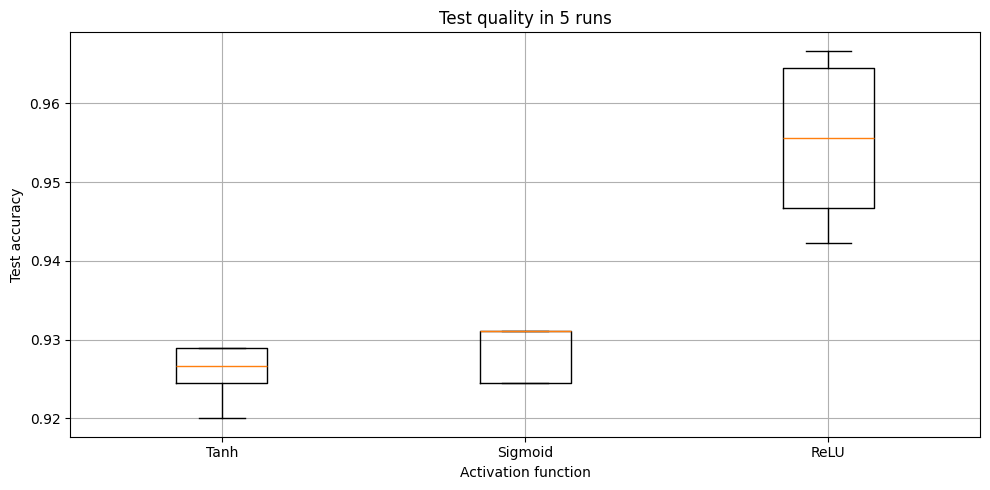

In [137]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test.T, labels=act_func_vars, showfliers=False)

ax.set_title("Test quality in 5 runs")
ax.set_xlabel("Activation function")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как отличаются качество на обучении и контроле и устойчивость процесса обучения при различных функциях активации?

__Ответы:__

При ReLU разница между качеством на контроле и обучении меньше остальных и при этом качество на контроле больше. Более всего устойчив Tanh, т.к взяли Kaiming благодаря которому у Tanh матожидание активаций и градиентов равно 0, а дисперсия постоянна, следовательно не будет возникать взрывов и затуханий градиентов из-за которых какие то веса не дообучатся. Менее устойчивым оказался Sigmoid - из-за того, что при больших значениях становится приблизительно константой и её производная становится близкой к нулю. ReLU менее всего устойчив, наверное потому что при разных запусках какие то нейроны отмирали из-за отрицательных значений.

\* Несколько фрагментов кода в задании написаны на основе материалов [курса по глубинному обучению на ФКН НИУ ВШЭ](https://www.hse.ru/ba/ami/courses/205504078.html)

### `Реализация метода оптимизации (1.4 балла)`

В этой части задания реализуйте метод оптимизации SGD + momentum. Упрощённая версия более общего алгоритма [отсюда](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html):

$$
\begin{aligned}
    &\rule{70mm}{0.4pt}                                                             \\
    &\textbf{input}      : \gamma \text{ (lr)}, \: \theta_0 \text{ (params)}, \: X \text{ (data)},       \\
    &\hspace{13mm} \: f(\theta) \text{ (objective)}, \:\mu \text{ (momentum)}       \\[-1.ex]
    &\rule{70mm}{0.4pt}                                                             \\
    &\textbf{for} \: t=1 \: \textbf{to} \: \ldots \: \textbf{do}                    \\
    &\hspace{5mm}\mathcal{X} \leftarrow \texttt{list\_of\_random\_batches}(X)\\
    &\hspace{5mm}\textbf{for} \: i=1 \: \textbf{to} \: \ldots \: \textbf{do}                    \\
    &\hspace{10mm}g_t\leftarrow   \nabla_{\theta} f_t (\theta_{t-1},\mathcal{X}_i)      \\
    &\hspace{10mm}\textbf{if} \: \mu \neq 0                                          \\
    &\hspace{15mm}\textbf{if} \: t > 1                                              \\
    &\hspace{20mm} \textbf{b}_t \leftarrow \mu \textbf{b}_{t-1} + g_t               \\
    &\hspace{15mm}\textbf{else}                                                     \\
    &\hspace{20mm} \textbf{b}_t \leftarrow g_t                                      \\
    &\hspace{15mm} g_t  \leftarrow  \textbf{b}_t                                     \\
    &\hspace{10mm}\theta_t \leftarrow \theta_{t-1} - \gamma g_t                      \\[-1.ex]
    &\rule{70mm}{0.4pt}                                                             \\[-1.ex]
    &\bf{return} \:  \theta_t                                                       \\[-1.ex]
    &\rule{70mm}{0.4pt}                                                             \\[-1.ex]
\end{aligned}
$$

Проще всего будет написать `custom minimizer` (смотри [документацию scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)).

In [138]:
import random

In [139]:
from scipy.optimize import OptimizeResult


def SGD(fun, x0, args, **kwargs) -> OptimizeResult:
    callback = kwargs['callback']   # feed weights from each iteration to update network and log metrics
    mu = kwargs['momentum']
    n_iter = kwargs['n_iter']
    gamma = kwargs['lr']
    jac = kwargs['jac']
    batch_size = kwargs['batch_size']

    net, X, y = args

    # your code is here

    #batch

    def list_of_batches():
        b = X.shape[0] // batch_size
        dif = X.shape[0] - b * batch_size
        if dif > 0:
            flag_b = 1
        else:
            flag_b = 0
        bat = np.arange(0, X.shape[0])
        np.random.shuffle(bat)
        list_of_batch = []
        y_batch = []
        k = 0
        while k < b * batch_size:
            list_of_batch.append(X[np.arange(k, k + batch_size), :])
            y_batch.append(y[np.arange(k, k + batch_size)])
            k += batch_size
        if flag_b:
            list_of_batch.append(X[np.arange(k, k + dif), :])
            y_batch.append(y[np.arange(k, k + dif)])
        return list_of_batch, y_batch
    #batch
    theta = np.array(x0, dtype=np.float64)
    treshold = 1e-4
    prev_loss = float('inf')
    for t in range(1, n_iter):
        x_batch, y_batch = list_of_batches()
        b_t = np.zeros_like(jac(theta, (net, x_batch[0], y_batch[0])))
        for i in range(len(x_batch)):
            g_t = jac(theta, (net, x_batch[i], y_batch[i]))
            if mu != 0:
                b_t = mu * b_t + g_t
                g_t = b_t
            theta = theta - gamma * g_t
            if callback:
                callback(theta)
        loss = fun(theta, (net, X, y))
        if abs(prev_loss - loss) < treshold:
            print(f"Stopping early at iteration {t}, loss: {loss}")
            break
        prev_loss = loss
    return OptimizeResult(x=theta, nit=n_iter, success=True, message="SGD completed")

In [140]:
network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
initialize_network(network, "Xavier")
weights = get_weights(network)
cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
result = minimize(
    fun=lambda w, args: compute_loss_grad(w, args)[0],
    x0=weights,
    args=(network, X_train, y_train),
    method=SGD,
    callback=cb.call,
    options={
        'n_iter': 100,
        'lr': 0.01,
        'momentum': 0.9,
        'batch_size': 32,
    },
    jac=lambda w, args: compute_loss_grad(w, args)[1]
)

print("Optimized parameters:", result.x)


Stopping early at iteration 16, loss: 0.10027278443231079
Optimized parameters: [-0.01066396  0.0071821  -0.00266606 ... -0.01461672 -0.02207484
  0.02853548]


**Задание 1. (0.5 балла)** Продемонстрируйте правильную работу метода оптимизации, получив `test_accuracy>=0.9`.

In [141]:
set_weights(result["x"], network)
train_accuracy = np.sum(predict(network, X_train) == y_train) / y_train.shape[0]
test_accuracy = np.sum(predict(network, X_test) == y_test) / y_test.shape[0]
print(f"train_accuracy: {train_accuracy}, test_accuracy: {test_accuracy}")

train_accuracy: 0.9643652561247216, test_accuracy: 0.9244444444444444


**Задание 2. (0.8 балла)** Сравните три алгоритма:
1. LBFGS-B
2. SGD
3. SGD + momentum

Для этого одновременно переберите следующие гиперпараметры:
- значения `lr` на отрезке `[1e-3, 1e-1]` по логарифмической сетке
- два значения `momentum`: `0` и `0.9`
- значения `batch_size`: `8` и `32`

В каждом запуске сохраняйте три метрики: итоговое accuracy на тесте и на трейне и время обучения.

Для каждого из трёх алгоритмов выберите лучшие `lr` и `batch_size` по `test_accuracy`. Постройте для них кривые обучения (пример ниже). Сделайте выводы.

![](comparison.svg)

### SGD без momentum


In [142]:
from scipy.optimize import OptimizeResult


def SGD_default(fun, x0, args, **kwargs) -> OptimizeResult:
    callback = kwargs['callback']   # feed weights from each iteration to update network and log metrics
    mu = kwargs['momentum']
    n_iter = kwargs['n_iter']
    gamma = kwargs['lr']
    jac = kwargs['jac']
    batch_size = kwargs['batch_size']

    net, X, y = args

    # your code is here

    #batch
    def list_of_batches():
        b = X.shape[0] // batch_size
        dif = X.shape[0] - b * batch_size
        if dif > 0:
            flag_b = 1
        else:
            flag_b = 0
        bat = np.arange(0, X.shape[0])
        np.random.shuffle(bat)
        list_of_batch = []
        y_batch = []
        k = 0
        while k < b * batch_size:
            list_of_batch.append(X[np.arange(k, k + batch_size), :])
            y_batch.append(y[np.arange(k, k + batch_size)])
            k += batch_size
        if flag_b:
            list_of_batch.append(X[np.arange(k, k + dif), :])
            y_batch.append(y[np.arange(k, k + dif)])
        return list_of_batch, y_batch
    #batch
    theta = np.array(x0, dtype=np.float64)
    treshold = 1e-4
    prev_loss = float('inf')
    for t in range(1, n_iter):
        x_batch, y_batch = list_of_batches()
        b_t = np.zeros_like(jac(theta, (net, x_batch[0], y_batch[0])))
        for i in range(len(x_batch)):
            g_t = jac(theta, (net, x_batch[i], y_batch[i]))
            theta = theta - gamma * g_t
            if callback:
                callback(theta)
        loss = fun(theta, (net, X, y))
        if abs(prev_loss - loss) < treshold:
            print(f"Stopping early at iteration {t}, loss: {loss}")
            break
        prev_loss = loss

    return OptimizeResult(x=theta, nit=n_iter, success=True, message="SGD completed")

In [143]:
import time

In [144]:
# your code is here
methods = {
    "SGD": SGD,
    "SGD_default": SGD_default
    }
results = {
    "SGD": [],
    "SGD_default": [],
    "L-BFGS-B": []
}

for method in methods:
    for batch_size in [8, 32]:
        for momentum in [0, 0.9]:
            for lr in np.logspace(-3, -1, num=4):
                start_time = time.time()
                network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
                initialize_network(network, "Xavier")
                weights = get_weights(network)
                cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
                print(method, f"\t lr: {lr}, batch_size: {batch_size}, momentum: {momentum}")
                result = minimize(
                    fun=lambda w, args: compute_loss_grad(w, args)[0],
                    x0=weights,
                    args=(network, X_train, y_train),
                    method=methods[method],
                    callback=cb.call,
                    options={
                        'n_iter': 100,
                        'lr': lr,
                        'momentum': momentum,
                        'batch_size': batch_size
                    },
                    jac=lambda w, args: compute_loss_grad(w, args)[1]
                )
                print(f"accuracy_train: {cb.train_acc[-1]}, accuracy_test: {cb.test_acc[-1]}")
                end_time = time.time()
                execution_time = end_time - start_time
                results[method].append([cb.train_acc[-1], cb.test_acc[-1], execution_time, (batch_size, momentum, lr)])


SGD 	 lr: 0.001, batch_size: 8, momentum: 0
accuracy_train: 0.9725315515961396, accuracy_test: 0.9444444444444444
SGD 	 lr: 0.004641588833612777, batch_size: 8, momentum: 0
accuracy_train: 0.9992576095025983, accuracy_test: 0.9511111111111111
SGD 	 lr: 0.021544346900318832, batch_size: 8, momentum: 0
Stopping early at iteration 28, loss: 0.003949773015578585
accuracy_train: 0.9992576095025983, accuracy_test: 0.9733333333333334
SGD 	 lr: 0.1, batch_size: 8, momentum: 0
Stopping early at iteration 63, loss: 1.9396339357486043
accuracy_train: 0.19673348181143283, accuracy_test: 0.18
SGD 	 lr: 0.001, batch_size: 8, momentum: 0.9
Stopping early at iteration 47, loss: 0.006993210187876425
accuracy_train: 0.9992576095025983, accuracy_test: 0.96
SGD 	 lr: 0.004641588833612777, batch_size: 8, momentum: 0.9
Stopping early at iteration 25, loss: 0.0004650116523485436
accuracy_train: 1.0, accuracy_test: 0.9755555555555555
SGD 	 lr: 0.021544346900318832, batch_size: 8, momentum: 0.9
Stopping early 

In [145]:
start_time = time.time()
network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
initialize_network(network, "Xavier")
weights = get_weights(network)
cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
res = minimize(
    compute_loss_grad, weights,
    args=[network, X_train, y_train],
    method="L-BFGS-B",
    jac=True,
    callback=cb.call
)
print(f"accuracy_train: {cb.train_acc[-1]}, accuracy_test: {cb.test_acc[-1]}")
end_time = time.time()
execution_time = end_time - start_time
results["L-BFGS-B"] = [cb.train_acc[-1], cb.test_acc[-1], execution_time]

accuracy_train: 1.0, accuracy_test: 0.9555555555555556


In [146]:
lb = results['L-BFGS-B']
sm = max(results['SGD'], key=lambda k: k[1])
sg = max(results['SGD_default'], key=lambda k: k[1])

print(f"best for L-BFGS-B: acc_test: {lb[1]}, time: {lb[2]}")
print(f"best for SGD+momentum: acc_test: {sm[1]}, lr: {sm[-1][-1]}, batch_size: {sm[-1][0]}, time: {sm[2]}, momentum: {sm[-1][1]}")
print(f"best for SGD: acc_test: {sg[1]}, lr: {sg[-1][-1]}, batch_size: {sg[-1][0]}, time: {sg[2]}, momentum: {sg[-1][1]}")

best for L-BFGS-B: acc_test: 0.9555555555555556, time: 1.1738622188568115
best for SGD+momentum: acc_test: 0.9755555555555555, lr: 0.004641588833612777, batch_size: 8, time: 18.797471523284912, momentum: 0.9
best for SGD: acc_test: 0.9777777777777777, lr: 0.021544346900318832, batch_size: 8, time: 18.318933248519897, momentum: 0


In [147]:
network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
initialize_network(network, "Xavier")
weights = get_weights(network)
cb1 = Callback(network, X_train, y_train, X_test, y_test, print=False)
result = minimize(
    fun=lambda w, args: compute_loss_grad(w, args)[0],
    x0=weights,
    args=(network, X_train, y_train),
    method=SGD,
    callback=cb1.call,
    options={
        'n_iter': 100,
        'lr': sm[-1][-1],
        'momentum': sm[-1][1],
        'batch_size': sm[-1][0]
    },
    jac=lambda w, args: compute_loss_grad(w, args)[1]
)


network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
initialize_network(network, "Xavier")
weights = get_weights(network)
cb2 = Callback(network, X_train, y_train, X_test, y_test, print=False)
result = minimize(
    fun=lambda w, args: compute_loss_grad(w, args)[0],
    x0=weights,
    args=(network, X_train, y_train),
    method=SGD_default,
    callback=cb2.call,
    options={
        'n_iter': 100,
        'lr': sg[-1][-1],
        'momentum': sg[-1][1],
        'batch_size': sg[-1][0]
    },
    jac=lambda w, args: compute_loss_grad(w, args)[1]
)



network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
initialize_network(network, "Xavier")
weights = get_weights(network)
cb3 = Callback(network, X_train, y_train, X_test, y_test, print=False)
res = minimize(
    compute_loss_grad, weights,
    args=[network, X_train, y_train],
    method="L-BFGS-B",
    jac=True,
    callback=cb3.call
)

Stopping early at iteration 28, loss: 0.00029386636438740637
Stopping early at iteration 36, loss: 0.0006968040037538483


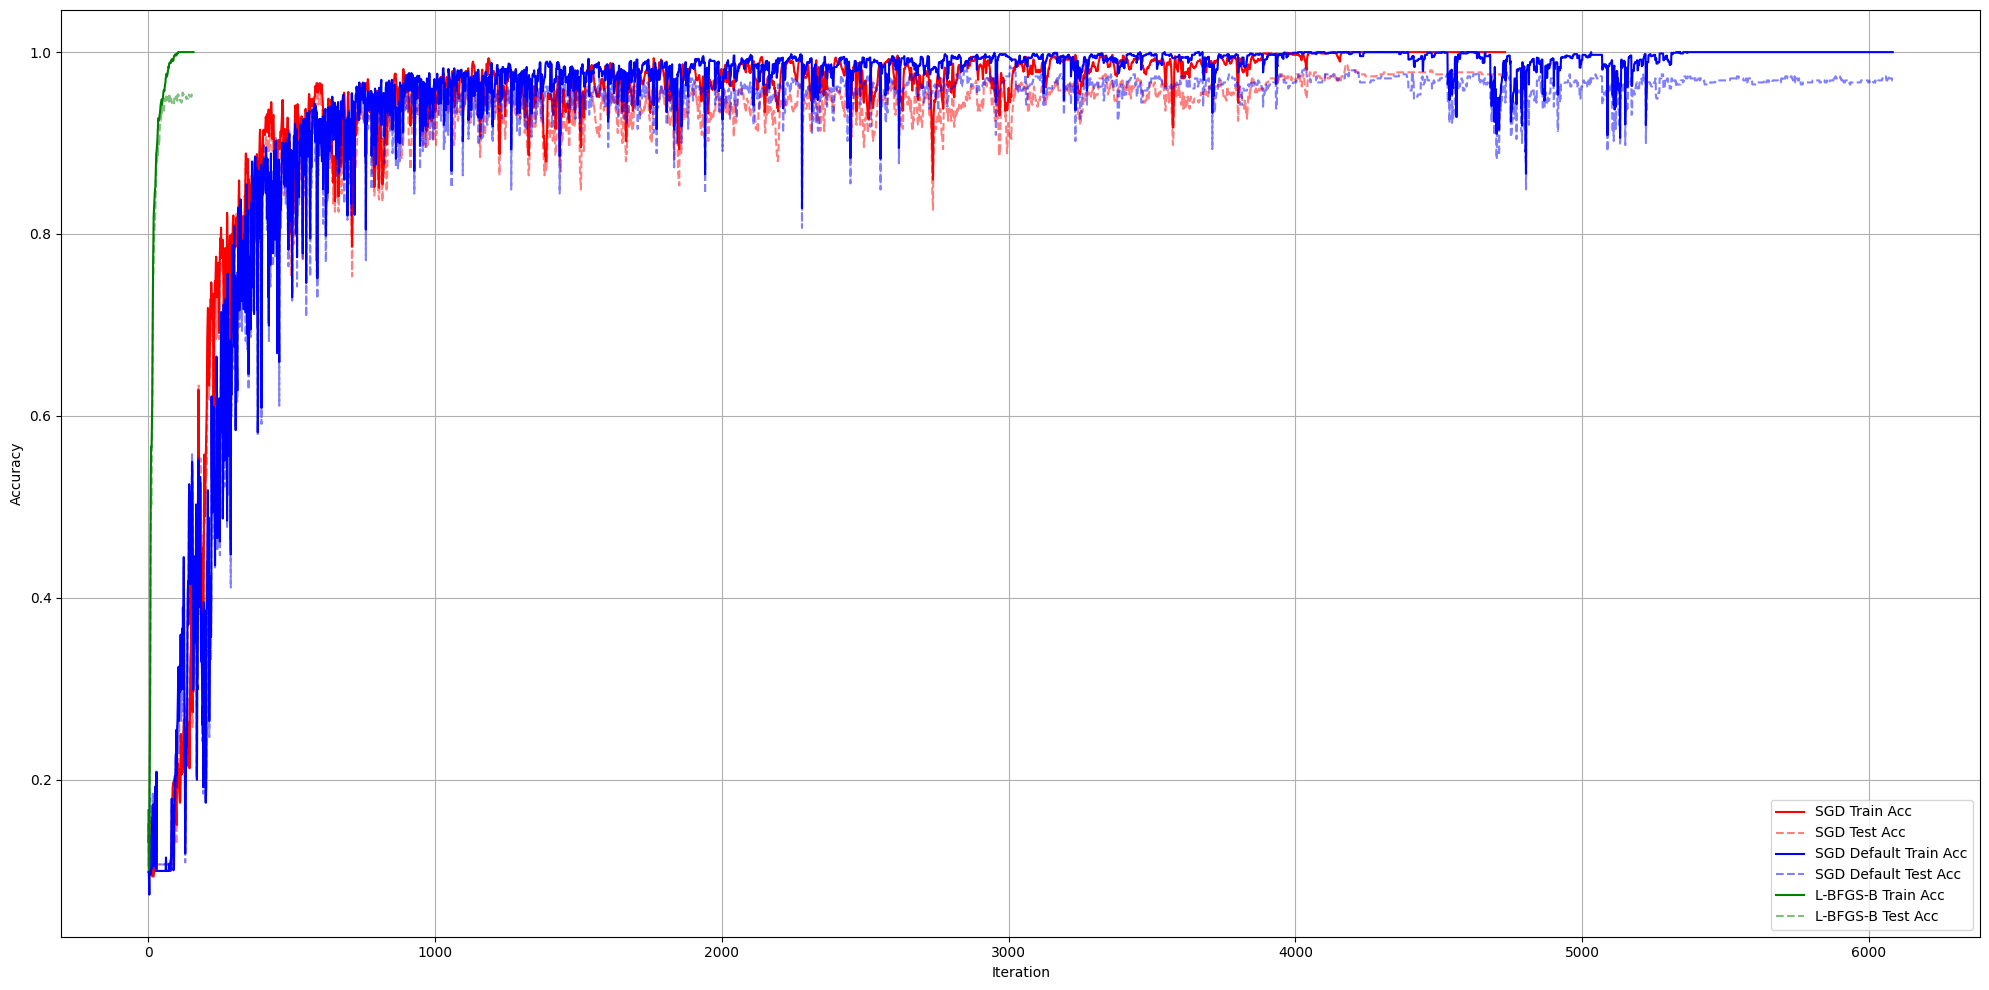

In [148]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(cb1.train_acc, label="SGD Train Acc", color="r", linestyle="-")
ax.plot(cb1.test_acc, label="SGD Test Acc", color="r", linestyle="--", alpha=0.5)

ax.plot(cb2.train_acc, label="SGD Default Train Acc", color="b", linestyle="-")
ax.plot(cb2.test_acc, label="SGD Default Test Acc", color="b", linestyle="--", alpha=0.5)

ax.plot(cb3.train_acc, label="L-BFGS-B Train Acc", color="g", linestyle="-")
ax.plot(cb3.test_acc, label="L-BFGS-B Test Acc", color="g", linestyle="--", alpha=0.5)

ax.set_xlabel("Iteration")
ax.set_ylabel("Accuracy")
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

**Выводы:**

In [152]:
for method in results:
    print(f"Method: {method}")
    if method != "L-BFGS-B":
        for batch_size in [8, 32]:
            filtered_results = [result for result in results[method] if result[3][0] == batch_size]
            avg_accuracy_test = np.mean([result[1] for result in filtered_results])
            print(f"  Batch Size: {batch_size}, Average Test Accuracy: {avg_accuracy_test:.4f}")




Method: SGD
  Batch Size: 8, Average Test Accuracy: 0.6467
  Batch Size: 32, Average Test Accuracy: 0.7219
Method: SGD_default
  Batch Size: 8, Average Test Accuracy: 0.7908
  Batch Size: 32, Average Test Accuracy: 0.7119
Method: L-BFGS-B


**Задание 3. (0.1 балла)** Для отобранных в прошлом задании трёх алгоритмов ответье на вопрос: как меняются запуски для двух значений `batch_size`.

**Ответ:**
в SGD+Momentum в среднем точность на 32 больше чем на 8, вероятно при бОльшем размере батча инерция работает лучше.
в SGD при размере батча 8 точность в среднем получилась больше, чем при 32. Вероятно это связано с тем, что из-за бОльшей шумности SGD при 8 перепрыгнул локальные минимумы, в то время как менее шумный при 32 нет, хотя в целом разница небольшая.

## `Бонусная часть`

### `Реализация метода оптимизации (1 балл)`

Реализуйте метод оптимизации Adam и сравните его работу с SGD + momentum, проведя эксперимент, как в задании 2 (перебор гиперпараметров + кривые обучения).

### `Dropout (1 балл)`

Реализуйте слой Dropout. Сравните обучение сети из большого числа слоёв при использовании Dropout и без его использования (предварительно подберите адекватный параметр $p$). Сделайте выводы.

### `BatchNormalization (1 балл)`

Реализуйте слой `BatchNormalization`. Сравните обучение сети из большого числа слоёв при использовании `BatchNormalization` и без его использования. Сделайте выводы.